In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input
/kaggle/input/sensors-data-acv
/kaggle/input/sensors-data-acv/Sensors_data
/kaggle/input/sensors-data-acv/Sensors_data/Temperature
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Test
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Test/Winter
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Test/Summer
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Test/Autumn
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Test/Spring
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Train
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Train/Winter
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Train/Summer
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Train/Autumn
/kaggle/input/sensors-data-acv/Sensors_data/Temperature/Train/Spring
/kaggle/input/sensors-data-acv/Sensors_data/Humidity
/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Test
/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Test/Winter
/kaggle/

In [1]:
import os
import numpy as np
import pandas as pd

from kaggle_datasets import KaggleDatasets
import tensorflow as tf

from tensorflow.keras.applications import DenseNet121

import cv2
from IPython.display import SVG

!pip install plotly

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

!pip install seaborn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

D0519 02:14:31.637380487      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0519 02:14:31.637407919      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0519 02:14:31.637411287      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0519 02:14:31.637413825      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0519 02:14:31.637415930      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0519 02:14:31.637418353      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0519 02:14:31.637420668      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0519 02:14:31.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 53.7 MB/s eta 0:00:0000:0100:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 KB 7.2 MB/s eta 0:00:0000:01
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.


In [2]:
train_path = '/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Train/'
test_path = '/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Test/'
train_folders = np.sort(os.listdir(train_path))
test_folders = np.sort(os.listdir(test_path))

In [3]:
print(train_folders)

['Autumn' 'Spring' 'Summer' 'Winter']


In [4]:
train_images = []

path = test_path

for mod in test_folders:
    images = os.listdir(path + mod)[:1]
    for file_name in images:
        image_path = path+ mod+'/'+file_name
        
        orig_image = cv2.imread(image_path)
        image = orig_image[80:-80, 110:-100]        # cropping image
        train_images.append(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        
train_images = np.array(train_images)

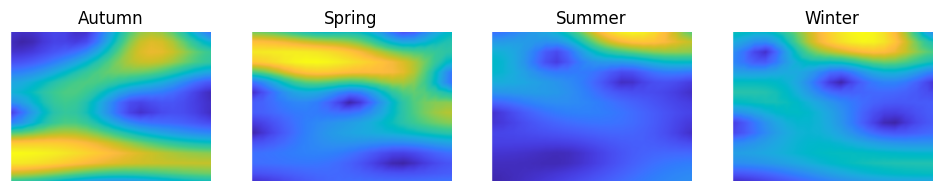

In [5]:
def display_images():
    rows, col = 2, 5
    #rows, col = 2, 2
    fig = plt.figure(figsize=(15,7))
    for index, image in enumerate(train_images):
        ax = fig.add_subplot(rows, col, index+1)
        ax.imshow(train_images[index])
        ax.set_title(train_folders[index])
        ax.axis('off')
        
    plt.show()
    
display_images()

In [6]:
train_labels = []
test_labels = []

def generate_train_labels():
    for CLASS in train_folders:
        images = os.listdir( train_path + CLASS)
        for image in range(len(images)):
            train_labels.append(CLASS)
            
def generate_test_labels():
    for CLASS in test_folders:
        images = os.listdir( test_path +CLASS)
        for image in range(len(images)):
            test_labels.append(CLASS)

generate_train_labels()
generate_test_labels()

train_labels = pd.get_dummies(train_labels)
test_labels = pd.get_dummies(test_labels)

labels = train_labels

train_labels = np.float32(train_labels[list(train_folders)].values)
test_labels = np.float32(test_labels[list(test_folders)].values)

train_labels[:3]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [7]:
fig = go.Figure(
                [go.Pie(labels= train_folders, 
                        values=labels.sum().values,
                        marker=dict(colors=['#026416','#C73104','#C05209','#6F2F05']))
                ])

fig.update_layout(width=900, height=400, title= {'text': "Dataset Distribution",
                                                'y':0.95,'x':0.43,
                                                'xanchor': 'center','yanchor': 'top'},
                 margin = dict(l=50, r=10, t=50, b=30))

In [8]:
GCS_PATH = KaggleDatasets().get_gcs_path()
GCS_PATH

get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/sensors-data-acv


'/kaggle/input/sensors-data-acv'

In [12]:
GCS_PATH = KaggleDatasets().get_gcs_path()

test_path = []
train_path = []

def generate_test_path():
    path_root = GCS_PATH + '/Sensors_data/Humidity/Test/'
    for CLASS in test_folders:
        images = os.listdir('/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Test/' + CLASS)
        for image in images:
            test_path.append(path_root+CLASS+'/'+image)

def generate_train_path():
    path_root = GCS_PATH + '/Sensors_data/Humidity/Train/'
    for CLASS in train_folders:
        images = os.listdir( '/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Train/' + CLASS)
        for image in images:
            train_path.append(path_root+CLASS+'/'+image)
            
generate_train_path()
generate_test_path()

get_gcs_path is not required on TPU VMs which can directly use Kaggle datasets, using path: /kaggle/input/sensors-data-acv


In [13]:
train_path[:2]

['/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Train/Autumn/Humidity51.png',
 '/kaggle/input/sensors-data-acv/Sensors_data/Humidity/Train/Autumn/Humidity46.png']

In [14]:
print('Train :')
print('   Labels')
print('   ',train_labels.shape)
print('   Images')
print('   ',len(train_path))
print('')
print('Test :')
print('   Labels')
print('   ',test_labels.shape)
print('   Images')
print('   ',len(test_path))

Train :
   Labels
    (276, 4)
   Images
    276

Test :
   Labels
    (66, 4)
   Images
    66


In [105]:
def decode_image(filename, label):
    image_size = (512,512)
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.image.resize(image, image_size)
    
    return image, label

def augment_image(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    
    return image, label

In [106]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)


# instantiate a distribution strategy
strategy = tf.distribute.experimental.TPUStrategy(tpu)


BATCH_SIZE = 16 * strategy.num_replicas_in_sync

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Initializing the TPU system: local


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [107]:
AUTO = tf.data.experimental.AUTOTUNE

train_dataset = (
        tf.data.Dataset\
        .from_tensor_slices((train_path, train_labels))\
        .map(decode_image, num_parallel_calls=AUTO)\
        .map(augment_image, num_parallel_calls=AUTO)\
        .repeat()\
        .shuffle(512)\
        .batch(BATCH_SIZE)\
        .prefetch(AUTO)\
        )

test_dataset = (
    tf.data.Dataset\
    .from_tensor_slices((test_path, test_labels))\
    .map(decode_image, num_parallel_calls=AUTO)\
    .batch(BATCH_SIZE)
    .cache()
    .prefetch(AUTO)
)

In [109]:
IMAGE_SIZE = 512

In [110]:
from tensorflow.keras.models import *
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Input, Dense

In [115]:
from tensorflow.keras.optimizers import *

with strategy.scope():
    model = tf.keras.models.Sequential()

    model.add(DenseNet121(
                     input_shape=(512,512,3),
                     weights = 'imagenet',
                     include_top=False))

    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(Dropout(0.1))

    model.add(tf.keras.layers.Dense(train_labels.shape[1],
                                   activation='softmax'))

#     model.compile(optimizer='adam', 
#                  loss='categorical_crossentropy',
#                  metrics=['categorical_accuracy'])

    model.compile(optimizer=Adam(learning_rate=0.00001), 
                 loss='categorical_crossentropy',
                 metrics=['categorical_accuracy'])
    
    model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 16, 16, 1024)      7037504   
                                                                 
 global_average_pooling2d_7   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dropout_27 (Dropout)        (None, 1024)              0         
                                                                 
 dense_35 (Dense)            (None, 4)                 4100      
                                                                 
Total params: 7,041,604
Trainable params: 6,957,956
Non-trainable params: 83,648
_________________________________________________________________


In [116]:
# Learning rate scheduler

def build_lrfn(lr_start=0.001, lr_max=0.005, 
               lr_min=0.001, lr_rampup_epochs=5, 
               lr_sustain_epochs=0, lr_exp_decay=.8):
    lr_max = lr_max * strategy.num_replicas_in_sync

    def lrfn(epoch):
        if epoch < lr_rampup_epochs:
            lr = (lr_max - lr_start) / lr_rampup_epochs * epoch + lr_start
        elif epoch < lr_rampup_epochs + lr_sustain_epochs:
            lr = lr_max
        else:
            lr = (lr_max - lr_min) *\
                 lr_exp_decay**(epoch - lr_rampup_epochs\
                                - lr_sustain_epochs) + lr_min
        return lr
    return lrfn

lrfn = build_lrfn()
lr_schedule = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose=1)
callbacks_list = [lr_schedule]
STEPS_PER_EPOCH = train_labels.shape[0]//BATCH_SIZE

In [117]:
history = model.fit(train_dataset,
                    epochs = 25,
                    #callbacks = callbacks_list,
                    steps_per_epoch = STEPS_PER_EPOCH,
                    validation_data = test_dataset)

Epoch 1/25


2023-05-19 03:55:13.452584: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-19 03:55:15.035553: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2/2 [==============================] - ETA: 0s - loss: 1.5090 - categorical_accuracy: 0.2461  

2023-05-19 03:56:43.563502: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-19 03:56:43.947675: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


2/2 [==============================] - 161s 24s/step - loss: 1.5090 - categorical_accuracy: 0.2461 - val_loss: 1.4045 - val_categorical_accuracy: 0.2727
Epoch 2/25
2/2 [==============================] - 2s 2s/step - loss: 1.4972 - categorical_accuracy: 0.2422 - val_loss: 1.4039 - val_categorical_accuracy: 0.2727
Epoch 3/25
2/2 [==============================] - 2s 2s/step - loss: 1.4598 - categorical_accuracy: 0.2578 - val_loss: 1.4020 - val_categorical_accuracy: 0.2727
Epoch 4/25
2/2 [==============================] - 2s 2s/step - loss: 1.4522 - categorical_accuracy: 0.2852 - val_loss: 1.4009 - val_categorical_accuracy: 0.2879
Epoch 5/25
2/2 [==============================] - 2s 2s/step - loss: 1.4486 - categorical_accuracy: 0.2812 - val_loss: 1.4009 - val_categorical_accuracy: 0.3030
Epoch 6/25
2/2 [==============================] - 2s 2s/step - loss: 1.4564 - categorical_accuracy: 0.2344 - val_loss: 1.4018 - val_categorical_accuracy: 0.3030
Epoch 7/25
2/2 [==========================

In [46]:
EPOCHS = 25
def display_training_curves(training, validation, yaxis):
    if yaxis == "loss":
        ylabel = "Loss"
        title = "Loss vs. Epochs"
    else:
        ylabel = "Accuracy"
        title = "Accuracy vs. Epochs"
        
    fig = go.Figure()
        
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=training, marker=dict(color="dodgerblue"),
               name="Train"))
    
    fig.add_trace(
        go.Scatter(x=np.arange(1, EPOCHS+1), mode='lines+markers', y=validation, marker=dict(color="darkorange"),
               name="Val"))
    
    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()

In [47]:
display_training_curves(
    history.history['categorical_accuracy'], 
    history.history['val_categorical_accuracy'], 
    'accuracy')

In [48]:
acc_df = pd.DataFrame(np.transpose([[*np.arange(1, EPOCHS+1).tolist()*3], ["Train"]*EPOCHS + ["Val"]*EPOCHS + ["Benchmark"]*EPOCHS,
                                     history.history['categorical_accuracy'] + history.history['val_categorical_accuracy'] + [1.0]*EPOCHS]))
acc_df.columns = ["Epochs", "Stage", "Accuracy"]
fig = px.bar(acc_df, x="Accuracy", y="Stage", animation_frame="Epochs", title="Accuracy vs. Epochs", color='Stage',
       color_discrete_map={"Train":"dodgerblue", "Val":"darkorange", "Benchmark":"seagreen"}, orientation="h")

fig.update_layout(
    xaxis = dict(
        autorange=False,
        range=[0, 1]
    )
)

fig.update_layout(template="plotly_white")

In [33]:
model.evaluate(test_dataset)

1/1 [==============================] - 1s 1s/step - loss: 1.3795 - categorical_accuracy: 0.2727


[1.3794612884521484, 0.27272728085517883]

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, zero_one_loss, classification_report

In [35]:
y_test = np.array([])
y_pred = np.array([])

for images, labels in test_dataset:
    y_test = np.append(y_test, np.array(labels).argmax(axis=1))
    y_pred= np.append(y_test, np.array(model.predict(images)).argmax(axis= -1))


2023-05-19 02:29:44.121927: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-05-19 02:29:44.200364: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


3/3 [==============================] - 17s 4s/step
